# Übung Lineare Regression

### Lineare Regression

Betrachten Sie das Beispiel mit $n=1$ aus der Vorlesung (Inputs $x^{(i)}$:
Alter in Jahren, Targets $y^{(i)}$: Größe in m). Lesen Sie zuerst die Daten ein:

In [16]:
import numpy as np
X = np.loadtxt('datasets/kids/k_x.dat')
X = np.reshape(X,(1,50))
y = np.loadtxt('datasets/kids/k_y.dat')
y = np.reshape(y,(50,1))
X

array([[2.0658746, 2.3684087, 2.3699929, 2.5420804, 2.549079 , 2.7866882,
        2.9116825, 3.035627 , 3.1146696, 3.1582389, 3.3275944, 3.3793165,
        3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462,
        4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443,
        4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623,
        5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914,
        6.1978026, 6.3510941, 6.4797033, 6.7383791, 6.8637686, 7.0223387,
        7.0782373, 7.1514232, 7.4664023, 7.5973874, 7.7440717, 7.7729662,
        7.8264514, 7.9306356]])

Erzeugen Sie die Matrix $\mathbf{X}$  aus der Vorlesung (d.h. mit 1 in der ersten Zeile).

- numpy.vstack hift Ihnen weiter

In [17]:
################
# Your code here
################
X = np.vstack((np.ones((1,50)),X))
X

array([[1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       ],
       [2.0658746, 2.3684087, 2.3699929, 2.5420804, 2.549079 , 2.7866882,
        2.9116825, 3.035627 , 3.1146696, 3.1582389, 3.3275944, 3.3793165,
        3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462,
        4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443,
        4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623,
       

### Gradient Descent

Führen Sie das Gradient Descent Verfahren aus der Vorlesung für obiges Beispiel durch. Initialisieren sie das die Parameter als normalverteilte Zufallszahlen und wählen Sie eine geeignete Learning Rate. 

- Als Ergebnis sollten Sie $(w_0,w_1) = (0.751,0.064)$ erhalten.

In [35]:
import matplotlib
import matplotlib.pyplot as plt

w = np.random.randn(2,1)*0.05
#print(w)
alpha = 0.001
iterations = 100000
################
# Your code here
################
for i in range(iterations):
    w = w - alpha*np.dot(X,np.dot(X.T,w)-y)
print(w)

[[0.75126625]
 [0.06370099]]


### Normal equation

Nutzen Sie die Normalengleichungen aus der Vorlesung um die Paramter $\vec{w}$ zu bestimmen. Vergleichen Sie mit dem Gradient Descent Verfahren.

In [4]:
################
# Your code here
################
w2 = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))
print(w2)

[[0.75126625]
 [0.06370099]]


### Evaluate cost function

Werten Sie die Cost Function auf einem Gitter aus, plotten Sie die Höhenlinen der Funktion (logarithmische Skala 
der Levels) und lesen die dann das Wertepaar $(w_0,w_1)$ ab, welches $J$ minimiert.

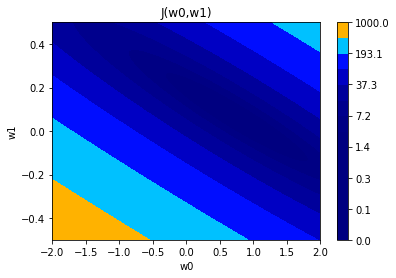

In [45]:
import matplotlib
import matplotlib.pyplot as plt

n = 100
w0,w1 = np.meshgrid(np.linspace(-2,2,n), np.linspace(-0.5,0.5,n))
J = np.zeros((n,n))

################
# Your code here
################

# Berechne für jeden Wert (w0,w1) auf dem Gitter den Wert der Costfunction J(w0,w1)
for k in range(n):
    for l in range(n):
        J[k,l] =  0.5*np.linalg.norm( np.dot(X.T,np.array( [ [w0[k,l]] , [w1[k,l] ] ] )) - y)**2
# Wir plotten die Höhenlinien mit logaritmischem Spacing
plt.contourf(w0, w1, J,levels = np.logspace(-2,3,15),cmap='jet')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('J(w0,w1)')

plt.show()


### Hypothese mittels Parameter

Schätzen Sie die Größe von Kindern im Alter von 3.5 und 7.2 Jahren.

In [55]:
################
# Your code here
################
h1 = np.dot(w.T,np.array([[1],[3.5]]))
h2 = np.dot(w.T,np.array([[1,7.2]]).T)
print(h1)
print(h2)


[[0.9742197]]
[[1.20991335]]


### Berechung der Parameter, Hypothese etc. mittels sklearn

Nutzen Sie das sklearn-Modul von python, um die lineare Regression durchzuführen (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), d.h.

- die Parameter $(w_0,w_1)$ zu bestimmen.
- die Größe einen Kindes von 7.2 Jahren zu schätzen
- den $R^2$-Wert zu berechnen 

In [61]:
# Wir laden die Daten neu ein
import numpy as np
X = np.loadtxt('datasets/kids/k_x.dat')
X = np.reshape(X,(50,1))
y = np.loadtxt('datasets/kids/k_y.dat')
y = np.reshape(y,(50,1))

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

# Wir führen die Regression durch
lr.fit(X,y)

# Wir berechnen die Parameter, schätzen den Hauspreis und berechnen R^2
w_0, w_1 = lr.intercept_ , lr.coef_
print(w_0,w_1)
print(lr.predict(np.array([[7.2,4,3.3]]).T))
print(lr.score(X,y))

[0.75126625] [[0.06370099]]
[[1.20991335]
 [1.00607019]
 [0.9614795 ]]
0.8581236645219811


### Multivariate Regression

Ein Beispiel für eine multivariate lineare Regression schätzen wir die Preise von Häusern mittels der beiden features Größe und Anzahl Räume. Benutzen Sie wieder das LinearRegression-Modul von sklearn.

- Bestimmen Sie die Parameter $(w_0,w_1,w_2)$.
- Schätzen Sie den Preis eines Hauses der Größe 1650 und 3 Zimmer.
- Berechnen Sie $R^2$.

In [67]:
import numpy as np
X = np.loadtxt('datasets/housing/h_x.dat')
y = np.loadtxt('datasets/housing/h_y.dat')
y = np.reshape(y,(47,1))

# Wir führen die Regression durch
lr.fit(X,y)

# Wir berechnen die Parameter, schätzen den Hauspreis und berechnen R^2
print(lr.intercept_ , lr.coef_)
print(lr.predict([[1650,3],[1700,2]]))
print(lr.score(X,y))

[89597.9095428] [[  139.21067402 -8738.01911233]]
[[293081.4643349 ]
 [308780.01714811]]
0.7329450180289142


In [63]:
X

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00],
       [1.985e+03, 4.000e+00],
       [1.534e+03, 3.000e+00],
       [1.427e+03, 3.000e+00],
       [1.380e+03, 3.000e+00],
       [1.494e+03, 3.000e+00],
       [1.940e+03, 4.000e+00],
       [2.000e+03, 3.000e+00],
       [1.890e+03, 3.000e+00],
       [4.478e+03, 5.000e+00],
       [1.268e+03, 3.000e+00],
       [2.300e+03, 4.000e+00],
       [1.320e+03, 2.000e+00],
       [1.236e+03, 3.000e+00],
       [2.609e+03, 4.000e+00],
       [3.031e+03, 4.000e+00],
       [1.767e+03, 3.000e+00],
       [1.888e+03, 2.000e+00],
       [1.604e+03, 3.000e+00],
       [1.962e+03, 4.000e+00],
       [3.890e+03, 3.000e+00],
       [1.100e+03, 3.000e+00],
       [1.458e+03, 3.000e+00],
       [2.526e+03, 3.000e+00],
       [2.200e+03, 3.000e+00],
       [2.637e+03, 3.000e+00],
       [1.839e+03, 2.000e+00],
       [1.000e+03, 1.000e+00],
       [